##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get Started with TensorFlow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To run the Colab notebook:

1. Connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

For more examples and guides (including details for this program), see [Get Started with TensorFlow](https://www.tensorflow.org/get_started/).

Let's get started, import the TensorFlow library into your program:

In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import os

In [15]:
#https://www.tensorflow.org/tutorials/load_data/images

#images folder path
dirname = os.getcwd()
# curpath = os.path.join(dirname, 'dev_ws/dataset/crop-images')
alternate = os.path.join(dirname, 'dev_ws/dataset/dataset-ml')

In [16]:
#https://www.tensorflow.org/tutorials/keras/save_and_load
#https://www.pythonfixing.com/2022/01/fixed-batchdataset-get-img-array-and.html 

#specify image dimensions
img_height = 28
img_width = 28

#load in the dataset with train-test split
train_ds = tf.keras.utils.image_dataset_from_directory(alternate, validation_split=0.2, subset="training", seed=123,
  image_size=(img_height, img_width))
val_ds = tf.keras.utils.image_dataset_from_directory(alternate, validation_split=0.2, subset="validation", seed=123,
  image_size=(img_height, img_width))

train_ds_unbatch = train_ds.unbatch()
x_train = list(train_ds_unbatch.map(lambda x, y: x))
y_train = list(train_ds_unbatch.map(lambda x, y: y))

val_ds_unbatch = val_ds.unbatch()
x_test = list(val_ds_unbatch.map(lambda x, y: x))
y_test = list(val_ds_unbatch.map(lambda x, y: y))

Found 296 files belonging to 9 classes.
Using 237 files for training.
Found 296 files belonging to 9 classes.
Using 59 files for validation.


Let's examine our dataset. Below code was taken from https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [18]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9)
])

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [20]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 75ms/step - loss: 2.1730 - accuracy: 0.1561 - val_loss: 2.0840 - val_accuracy: 0.3051
Epoch 2/10
8/8 [==============================] - 0s 26ms/step - loss: 2.0001 - accuracy: 0.2574 - val_loss: 1.9136 - val_accuracy: 0.4407
Epoch 3/10
8/8 [==============================] - 0s 38ms/step - loss: 1.6891 - accuracy: 0.5907 - val_loss: 1.5605 - val_accuracy: 0.5254
Epoch 4/10
8/8 [==============================] - 0s 34ms/step - loss: 1.1866 - accuracy: 0.6667 - val_loss: 1.0575 - val_accuracy: 0.7627
Epoch 5/10
8/8 [==============================] - 0s 23ms/step - loss: 0.7757 - accuracy: 0.7848 - val_loss: 0.7412 - val_accuracy: 0.8136
Epoch 6/10
8/8 [==============================] - 0s 21ms/step - loss: 0.4845 - accuracy: 0.8650 - val_loss: 0.5233 - val_accuracy: 0.8305
Epoch 7/10
8/8 [==============================] - 0s 28ms/step - loss: 0.3107 - accuracy: 0.9072 - val_loss: 0.3676 - val_accuracy: 0.9492
Epoch 8/10
8/8 [===========

You’ve now trained an image classifier. See [Get Started with TensorFlow](https://www.tensorflow.org/get_started/) to learn more.

In [21]:
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

Import libraries to handle loading and displaying images

Test our model with one random image in our test set.

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
Predicted Label:  6
Actual image: 


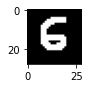

In [9]:
number_nine = image.load_img('mnist_test/6.png', target_size=(28, 28))
print(type(number_nine))
img_array = image.img_to_array(number_nine)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
print(type(img_preprocessed))
print("Predicted Label: ", np.argmax(model.predict(img_preprocessed)))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow(number_nine, cmap = 'gray')


Predicted Label:  7
Actual image: 


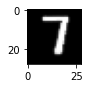

In [10]:
number_nine = image.load_img('mnist_test/dataset-ml/7/7-m-1.jpeg', target_size=(28, 28))
img_array = image.img_to_array(number_nine)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
print("Predicted Label: ", np.argmax(model.predict(img_preprocessed)))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow(number_nine, cmap = 'gray')

Predicted Label:  8
Actual image: 


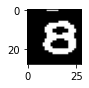

In [11]:
number_nine = image.load_img('mnist_test/47-8.jpeg', target_size=(28, 28))
img_array = image.img_to_array(number_nine)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
print("Predicted Label: ", np.argmax(model.predict(img_preprocessed)))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow(number_nine, cmap = 'gray')

Predicted Label:  2
Actual image: 


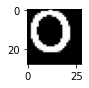

In [29]:
number_test = image.load_img('dev_ws/test/second_resize.jpeg', target_size=(28, 28))
img_array = image.img_to_array(number_test)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
print("Predicted Label: ", np.argmax(model.predict(img_preprocessed)))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow(number_test, cmap = 'gray')

In [22]:
from tensorflow import keras

In [23]:
dirname = os.getcwd()
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.join(dirname, "training_1")

In [24]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [25]:
os.listdir(checkpoint_dir)

['cp.ckpt.data-00000-of-00001', 'checkpoint', 'cp.ckpt.index']

In [26]:
# Save the entire model as a SavedModel.
model.save('dev_ws/saved_model/my_model.h5')

In [27]:
new_model = tf.keras.models.load_model('dev_ws/saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

Predicted Label:  0
Actual image: 


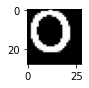

In [31]:
#0 with new model
number_test = image.load_img('dev_ws/test/second_resize.jpeg', target_size=(28, 28))
img_array = image.img_to_array(number_test)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
print("Predicted Label: ", np.argmax(new_model.predict(img_preprocessed)))
print('Actual image: ')
plt.figure(figsize = (1, 1))
plt.imshow(number_test, cmap = 'gray')

In [ ]:
new_model.save('dev_ws/saved_model/my_model.h5')

In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(val_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(val_ds).shape)